# Quantum Algorithm

A **quantum algorithm** is a set of instructions run on a **quantum computer** to solve a problem faster or more efficiently than a regular (classical) computer.

## Quantum algorithm components 
1. Qubit 
2. Quantum Circuit
3. Quantum Gates

## General Procedure 
1. Needed imports
2. Construct the circuit
3. Implement the desired gates
4. Measure the result- Final state of the Qubit

## What is a Qubit? 

Qubit is a **Quantum Mechanical** system, that take the rule of information unit.


-
## Quantum Mechanical system properties

- **Superposition**  
  $|\psi\rangle = A|\psi_1\rangle + B|\psi_2\rangle$  
  Ability for the quantum system to be in different states simultaneously.

- **Measurement**  
  Measuring the quantum state causes the superposition to collapse randomly.

- **Normalization**  
  The amplitude of the quantum wavefunction must be 1.

- **Born’s Rule**  
  Describes the probability of each state of the quantum system.  
  \(A^2 + B^2 = 1\)

- **Entanglement**  
  Ability to **exactly** know the measurement result of one part of the system when knowing the random result of its entangled partner.

## Example 

- **Zero state**  
  Ket notation:  
  $$
  |0\rangle
  $$  
  Vector notation:  
  $$
  |0\rangle = 
  \begin{bmatrix}
  1 \\
  0
  \end{bmatrix}
  $$

- **One state**  
  Ket notation:  
  $$
  |1\rangle
  $$  
  Vector notation:  
  $$
  |1\rangle = 
  \begin{bmatrix}
  0 \\
  1
  \end{bmatrix}
  $$

- **Equal superposition state** (e.g. after applying a Hadamard gate to \(|0\rangle\))  
  Ket notation:  
  $$
  |\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle
  $$  
  Vector notation:  
  $$
  |\psi\rangle =
  \frac{1}{\sqrt{2}}
  \begin{bmatrix}
  1 \\
  1
  \end{bmatrix}
  $$


# Quantum Gates 

## Classical vs Quantum Gates

| **Feature**         | **Classical Gate**           | **Quantum Gate**                          |
|---------------------|------------------------------|--------------------------------------------|
| **Input**           | Bits (0 or 1)                | Qubits (superposition of 0 and 1)          |
| **Output**          | Deterministic                | Probabilistic (after measurement)          |
| **Operation Type**  | Irreversible (mostly)        | Reversible                                 |
| **Logic**           | Boolean logic                | Quantum logic (unitary operations)         |



# Quantum Gates – Matrix Form

- **Pauli-X Gate (NOT Gate)**  
  $$
  X =
  \begin{bmatrix}
  0 & 1 \\
  1 & 0
  \end{bmatrix}
  $$

- **Hadamard Gate (H Gate)**  
  $$
  H = \frac{1}{\sqrt{2}}
  \begin{bmatrix}
  1 & 1 \\
  1 & -1
  \end{bmatrix}
  $$

- **Controlled-NOT Gate (CNOT or CX Gate)**  
  $$
  CX =
  \begin{bmatrix}
  1 & 0 & 0 & 0 \\
  0 & 1 & 0 & 0 \\
  0 & 0 & 0 & 1 \\
  0 & 0 & 1 & 0
  \end{bmatrix}
  $$

These matrices define how each gate transforms the state of qubits when applied.


## Let us CODE!!

In [1]:
# import the objects from qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator, StatevectorSimulator, UnitarySimulator

In [8]:
from random import randrange

# create a quantum circuit and its register objects
qreg = QuantumRegister(2) # quantum register with two quantum bits
creg = ClassicalRegister(2) # classical register with two classical bit
circuit = QuantumCircuit(qreg,creg) # quantum circuit composed by a quantum register and a classical register

# apply a Hadamard gate to the first qubit
circuit.h(qreg[0])

# set the second qubit to state |1>
circuit.x(qreg[1])

# apply CNOT(first_qubit,second_qubit)
circuit.cx(qreg[1],qreg[0])

# measure the both qubits
circuit.measure(qreg,creg)

print("The execution of the cell was completed, and the circuit was created :)")

The execution of the cell was completed, and the circuit was created :)


In [4]:
pip install pylatexenc


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: /home/jovyan/.qbraid/environments/qiskit_i5o7if/pyenv/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


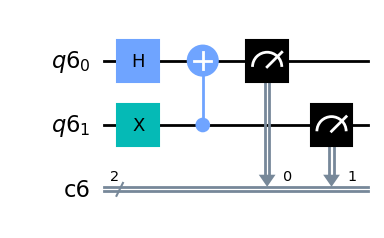

In [9]:
# draw circuit 
circuit.draw(output='mpl')

# the output will be a "matplotlib.Figure" object

In [17]:
## execute the circuit 1024 times
job = AerSimulator().run(circuit,shots=1024)
# get the result
counts = job.result().get_counts(circuit)
print(counts)

{'11': 517, '10': 507}


┌───┐┌───────────────┐┌───┐ ░ ┌─┐            
q_0: ────────────┤ X ├┤ U(2π/7,0,0,0) ├┤ X ├─░─┤M├────────────
        ┌───┐    └─┬─┘└───────┬───────┘└─┬─┘ ░ └╥┘┌─┐         
q_1: ───┤ H ├──────■──────────■──────────■───░──╫─┤M├─────────
        ├───┤                            │   ░  ║ └╥┘┌─┐      
q_2: ───┤ X ├────────────────────────────■───░──╫──╫─┤M├──────
     ┌──┴───┴───┐                            ░  ║  ║ └╥┘┌─┐   
q_3: ┤ Ry(2π/7) ├────────────────────────────░──╫──╫──╫─┤M├───
     └──┬───┬───┘                            ░  ║  ║  ║ └╥┘┌─┐
q_4: ───┤ Z ├────────────────────────────────░──╫──╫──╫──╫─┤M├
        └───┘                                ░  ║  ║  ║  ║ └╥┘
c: 5/═══════════════════════════════════════════╩══╩══╩══╩══╩═
                                                3  1  4  0  2

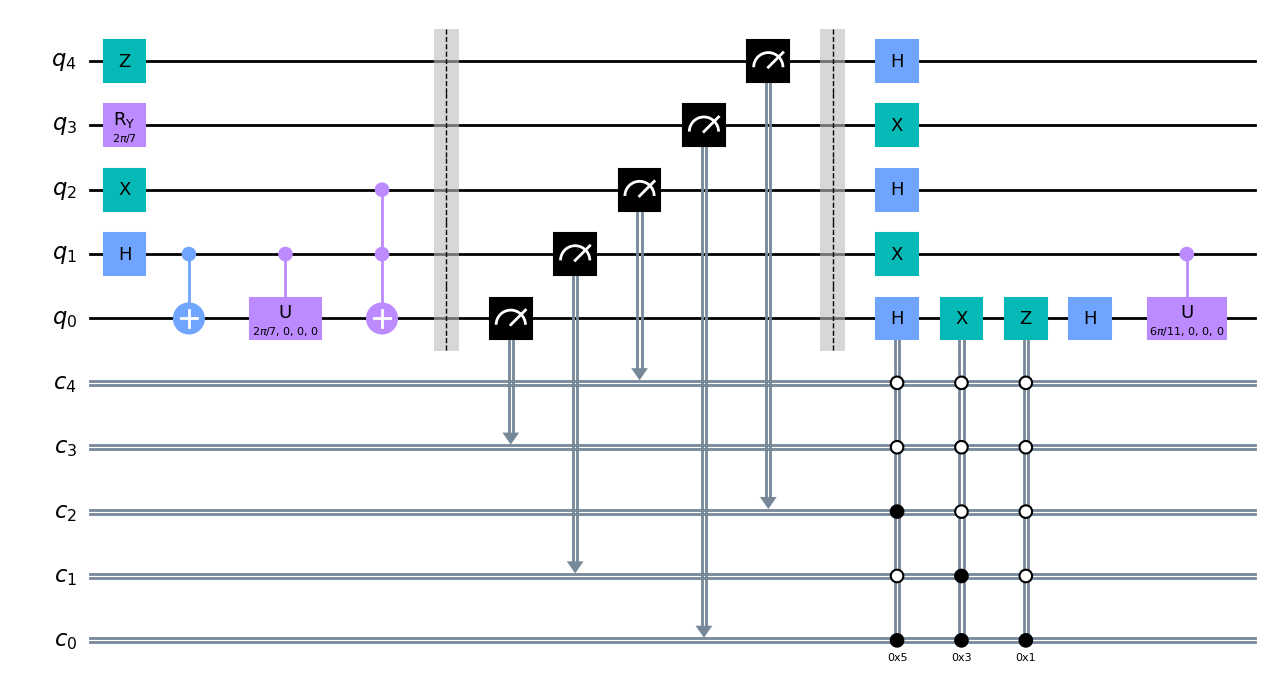

measurement outcomes are: {'10000': 434, '11011': 21, '10010': 314, '11010': 58, '10001': 91, '10011': 82}

unitary matrix is
[[ 0.   +0.j  0.   +0.j  0.532+0.j  0.847-0.j]
 [ 0.847+0.j -0.532+0.j  0.   +0.j  0.   +0.j]
 [ 0.532+0.j  0.847-0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.847+0.j -0.532+0.j]]

quantum state is
0.0+0.0j
0.847+0.0j
0.532+0.0j
0.0+0.0j

All looks fine :-)


In [14]:
from math import pi

# A quantum circuit is composed by a quantum and a classical register in Qiskit
q = QuantumRegister(5,"q") # this quantum register has 5 qubits
c = ClassicalRegister(5,"c") # this classical register has 5 classical bits

qc = QuantumCircuit(q,c) # a quantum circuit with quantum and classical registers q and c

qc.x(q[2]) # apply x-gate to the qubit "q[2]" of the quantum circuit "qc"
qc.z(q[4]) # apply z-gate to the qubit "q[4]" of the quantum circuit "qc"
qc.h(q[1]) # apply h-gate to the qubit "q[1]" of the quantum circuit "qc"

a = pi/7
qc.ry(2*a,q[3]) # apply ry-gate with the specified angle to the qubit "q[3]" of the quantum circuit "qc"

qc.cx(q[1],q[0]) # apply cx-gate to the qubits "q[1]" and "q[0]" of the quantum circuit "qc"

qc.cu(2*a,0,0,0,q[1],q[0]) # apply controlled rotation operator with the specified angle 
                          #  to the qubits "q[1]" and "q[0]" of the quantum circuit "qc"

qc.ccx(q[2],q[1],q[0]) # apply ccx-gate to the qubits "q[2]", "q[1]", and "q[0]" of the quantum circuit "qc"

qc.barrier()

qc.measure(q[0],c[3]) # measure q[0] and write the output on c[3]
qc.measure(q[1],c[1]) # measure q[1] and write the output on c[1]
qc.measure(q[2],c[4]) # measure q[2] and write the output on c[4]
qc.measure(q[3],c[0]) # measure q[3] and write the output on c[0]
qc.measure(q[4],c[2]) # measure q[4] and write the output on c[2]

display(qc.draw())

qc.barrier()

qc.h(q[0]).c_if(c,5)
qc.x(q[0]).c_if(c,3)
qc.z(q[0]).c_if(c,1)

for i in range(5):
    if i % 2 ==0: qc.h(q[i])
    else: qc.x(q[i])
        
b = 3*pi/11
qc.cu(2*b,0,0,0,q[1],q[0])

display(qc.draw(output='mpl',reverse_bits=True))

job = AerSimulator().run(qc,shots=1000)
counts = job.result().get_counts(qc)   
print("measurement outcomes are:",counts)
print()

q = QuantumRegister(2,"q")
c = ClassicalRegister(2,"c")

qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.ry(a,q[0])
qc.x(q[1])
qc.cx(q[0],q[1])

job = UnitarySimulator().run(qc,shots=1,optimization_level=0)
precision = 3
current_unitary=job.result().get_unitary(qc,precision).data

print("unitary matrix is")
print(current_unitary)
print()

job = StatevectorSimulator().run(qc,optimization_level=0)
precision = 3
current_quantum_state=job.result().get_statevector(qc,precision).data
print("quantum state is")
for val in current_quantum_state:
    print(str(val.real)+"+"+str(val.imag)+"j")

print()
print("All looks fine :-)")  